In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [1]:
# Load Data
df = pd.read_csv(r"C:\Python\AI\K-MEANS\Mall_Customers.csv")

NameError: name 'pd' is not defined

In [ ]:
# Cek kolom
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
# 2. Pilih fitur yang relevan untuk clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [ ]:
# 3. Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Menentukan jumlah klaster optimal dengan metode Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

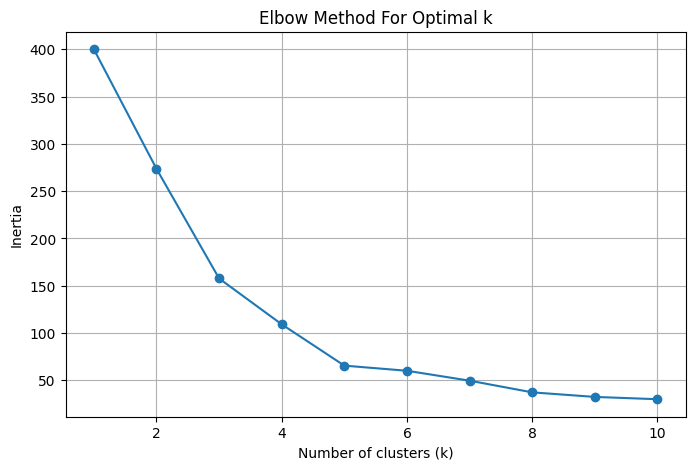

In [ ]:
# 5. Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
# 6. Clustering dengan KMeans (misal: k=5 berdasarkan elbow)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

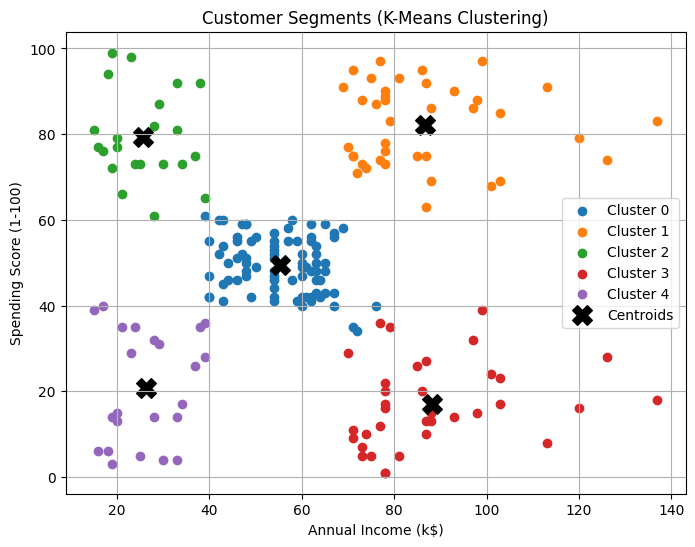

In [ ]:
# 7. Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster = df[df['Cluster'] == i]
    plt.scatter(cluster["Annual Income (k$)"], cluster["Spending Score (1-100)"], label=f"Cluster {i}")

plt.scatter(kmeans.cluster_centers_[:, 0]*X["Annual Income (k$)"].std() + X["Annual Income (k$)"].mean(),
            kmeans.cluster_centers_[:, 1]*X["Spending Score (1-100)"].std() + X["Spending Score (1-100)"].mean(),
            s=200, c='black', marker='X', label='Centroids')
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()